In [1]:
# Import the dependencies.  6.2.7 
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [2]:
# creating arrays of latitudes and longitudes, we'll declare each array as a variable. 
#adds zip object in memory The zip object packs each pair of lats and lngs having the same index in their respective array into a tuple
#You can only unzip a zipped tuple once before it is removed from the computer's memory.

In [3]:
# Create a set of random latitude and longitude combinations. if you need more increase size
lats = np.random.uniform(low=-90.000, high=90.000, size=1500)
lngs = np.random.uniform(low=-180.000, high=180.000, size=1500)
lat_lngs = zip(lats, lngs)
lat_lngs

In [4]:
# Add the latitudes and longitudes to a list.
coordinates = list(lat_lngs)

In [5]:
# Use the print() function to display the latitude and longitude combinations in list. Will create ordered pairs of lats & longs
for coordinate in coordinates:
    print(coordinate[0], coordinate[1])

49.29926240630016 70.82508217804306
63.00261670547252 -90.73369385153103
-70.25682799213263 -165.43882041809994
6.145109208796441 135.54413560820063
54.87538882337651 -71.39637207231047
-85.98401121461175 126.95594985709954
-74.5790017298906 11.98361610247747
46.86474526503727 113.44644136631541
-9.850374819296945 177.07820402435976
71.19955182238576 37.24357637911581
62.744047385073344 97.2502031791459
57.55399052789571 146.67219717517042
20.945836928184505 -174.69179031390706
26.62820902978801 -76.38083925587127
-77.76037939863971 37.276908614622585
11.802663181393399 41.19495283616055
45.269161693059715 51.50870263274311
-81.9070985923879 139.4042907694797
-70.43604034213554 -179.93734038128224
-32.570170354354204 132.86199873273966
28.10413823505509 -1.0158380637900564
-26.40311542644553 -59.122913772824276
-59.22162498361528 107.1290497748953
-29.872492086477678 104.89280390960721
-88.97326810679502 106.52191977102456
-88.75454817293478 41.03540428441187
38.813789667722915 -126.38

85.79169220399228 164.70743353652074
39.39088342304902 145.87966863672517
51.82393502152837 50.618929569837206
-49.79099980350377 33.824973991296815
-62.56240561516814 -70.82567152276424
44.15932000300759 -18.490514215007295
35.86969480560349 150.2533155414518
28.735130416988724 -179.64192384946523
31.12445042698957 -138.24408343788136
-40.41882333193083 -52.97319193040693
-89.83717140087158 -69.32539236648526
64.34193093535333 53.45850519868375
73.81368230458276 -109.24325133226233
-20.146787600832553 177.85136576615787
-33.189776786064236 -8.403430742748753
28.14838427943458 -90.13923614101301
76.17007056611001 84.90894058654118
15.59759228681368 -97.30092093356767
48.14477525700468 151.40923072954757
13.53299195892238 -9.787002979298052
-56.10578122438437 119.60069768804067
9.80416253369792 -154.70085431366988
52.268179028625724 88.88442670606298
81.87757980875492 -157.6032863452978
42.58693071556874 177.14575059394923
79.60808187549821 158.03689842512364
-71.244402693241 136.671635

In [6]:
#The citipy module finds the nearest city to the latitude and longitude pair with a population of 500 or more.
from citipy import citipy

In [7]:
# Create a list for holding the cities.  Module 6.1.5
cities = []
# Identify the nearest city for each latitude and longitude combination.
for coordinate in coordinates:
    city = citipy.nearest_city(coordinate[0], coordinate[1]).city_name

    # If the city is unique, then we will add it to the cities list.
    if city not in cities:
        cities.append(city)
# Print the city count to confirm sufficient count.
len(cities)

625

In [8]:
# Import the requests library.
import requests

# Import the API key.   Module 6.2.2
from config import weather_api_key

In [9]:
#Build the basic URL for the OpenWeatherMap with your weather_api_key added to the URL
url = "http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=" + weather_api_key


In [10]:
# Import the time library and the datetime module from the datetime library Mod 6.2.6
import time
from datetime import datetime

In [11]:
# Create an empty list to hold the weather data.
city_data = []
# Print the beginning of the logging.
print("Beginning Data Retrieval     ")
print("-----------------------------")

# Create counters.
record_count = 1
set_count = 1

# Loop through all the cities in the list.
# instead of using for loops use enumerate() to retrieve both the index, and the city for i, item in enumerate(list):

for i, city in enumerate(cities):

    # Group cities in sets of 50 for logging purposes.
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 1
        time.sleep(60)

    # Create endpoint URL with each city.
    city_url = url + "&q=" + city.replace(" ","+")

    # Log the URL, record, and set numbers and the city.
    print(f"Processing Record {record_count} of Set {set_count} | {city}")
    # Add 1 to the record count.
    record_count += 1
    
  # Run an API request for each of the cities.
    try:
     # Parse the JSON and retrieve data.
        city_weather = requests.get(city_url).json()
        # Parse out the needed data.
        city_lat = city_weather["coord"]["lat"]
        city_lng = city_weather["coord"]["lon"]
        city_max_temp = city_weather["main"]["temp_max"]
        city_humidity = city_weather["main"]["humidity"]
        city_clouds = city_weather["clouds"]["all"]
        city_wind = city_weather["wind"]["speed"]
        city_country = city_weather["sys"]["country"]
        # Convert the date to ISO standard.
        city_date = datetime.utcfromtimestamp(city_weather["dt"]).strftime('%Y-%m-%d %H:%M:%S')
        # Append the city information into city_data list.
        city_data.append({"City": city.title(),
                          "Lat": city_lat,
                          "Lng": city_lng,
                          "Max Temp": city_max_temp,
                          "Humidity": city_humidity,
                          "Cloudiness": city_clouds,
                          "Wind Speed": city_wind,
                          "Country": city_country,
                          "Date": city_date})  
                          
    # If an error is experienced, skip the city.
    except:
        print("City not found. Skipping...")
        pass
    
# isn't good coding practice to add the pass statement to the except block

# Indicate that Data Loading is complete.
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")       

Beginning Data Retrieval     
-----------------------------
Processing Record 1 of Set 1 | atasu
Processing Record 2 of Set 1 | thompson
Processing Record 3 of Set 1 | avarua
Processing Record 4 of Set 1 | airai
Processing Record 5 of Set 1 | dolbeau
City not found. Skipping...
Processing Record 6 of Set 1 | new norfolk
Processing Record 7 of Set 1 | hermanus
Processing Record 8 of Set 1 | baruun-urt
Processing Record 9 of Set 1 | asau
Processing Record 10 of Set 1 | tumannyy
City not found. Skipping...
Processing Record 11 of Set 1 | baykit
Processing Record 12 of Set 1 | okhotsk
Processing Record 13 of Set 1 | kapaa
Processing Record 14 of Set 1 | marsh harbour
Processing Record 15 of Set 1 | port alfred
Processing Record 16 of Set 1 | dubti
Processing Record 17 of Set 1 | shetpe
Processing Record 18 of Set 1 | hobart
Processing Record 19 of Set 1 | vaini
Processing Record 20 of Set 1 | flinders
Processing Record 21 of Set 1 | adrar
Processing Record 22 of Set 1 | humaita
Processing 

Processing Record 39 of Set 4 | ferrol
Processing Record 40 of Set 4 | yellowknife
Processing Record 41 of Set 4 | muzhi
Processing Record 42 of Set 4 | channel-port aux basques
Processing Record 43 of Set 4 | nykobing
City not found. Skipping...
Processing Record 44 of Set 4 | vaitupu
City not found. Skipping...
Processing Record 45 of Set 4 | jurm
Processing Record 46 of Set 4 | grevena
Processing Record 47 of Set 4 | mahebourg
Processing Record 48 of Set 4 | nicoya
Processing Record 49 of Set 4 | manta
Processing Record 50 of Set 4 | lorengau
Processing Record 1 of Set 5 | vostok
Processing Record 2 of Set 5 | muncar
Processing Record 3 of Set 5 | san patricio
Processing Record 4 of Set 5 | dudinka
Processing Record 5 of Set 5 | berlevag
Processing Record 6 of Set 5 | kodiak
Processing Record 7 of Set 5 | malindi
Processing Record 8 of Set 5 | tura
Processing Record 9 of Set 5 | saint marys
Processing Record 10 of Set 5 | aksu
Processing Record 11 of Set 5 | kota kinabalu
Processing

City not found. Skipping...
Processing Record 31 of Set 8 | krasnyy chikoy
Processing Record 32 of Set 8 | atar
Processing Record 33 of Set 8 | esso
Processing Record 34 of Set 8 | sobolevo
Processing Record 35 of Set 8 | san pedro
Processing Record 36 of Set 8 | tevaitoa
Processing Record 37 of Set 8 | la esperanza
Processing Record 38 of Set 8 | pemba
Processing Record 39 of Set 8 | kenai
Processing Record 40 of Set 8 | kalat
Processing Record 41 of Set 8 | marcona
City not found. Skipping...
Processing Record 42 of Set 8 | el copey
Processing Record 43 of Set 8 | miles city
Processing Record 44 of Set 8 | alappuzha
Processing Record 45 of Set 8 | bria
Processing Record 46 of Set 8 | novogornyy
Processing Record 47 of Set 8 | lavrentiya
Processing Record 48 of Set 8 | truth or consequences
Processing Record 49 of Set 8 | ternate
Processing Record 50 of Set 8 | abu zabad
Processing Record 1 of Set 9 | tawkar
City not found. Skipping...
Processing Record 2 of Set 9 | ambilobe
Processin

Processing Record 20 of Set 12 | toftir
City not found. Skipping...
Processing Record 21 of Set 12 | port-gentil
Processing Record 22 of Set 12 | mbandaka
Processing Record 23 of Set 12 | coahuayana
Processing Record 24 of Set 12 | bonavista
Processing Record 25 of Set 12 | hamilton
Processing Record 26 of Set 12 | tesalia
Processing Record 27 of Set 12 | chisec
Processing Record 28 of Set 12 | comodoro rivadavia
Processing Record 29 of Set 12 | merauke
Processing Record 30 of Set 12 | genoa
Processing Record 31 of Set 12 | kharp
Processing Record 32 of Set 12 | shingu
Processing Record 33 of Set 12 | yining
Processing Record 34 of Set 12 | kenora
Processing Record 35 of Set 12 | muana
Processing Record 36 of Set 12 | mampong
Processing Record 37 of Set 12 | dunedin
Processing Record 38 of Set 12 | scarborough
Processing Record 39 of Set 12 | preobrazheniye
Processing Record 40 of Set 12 | kaputa
Processing Record 41 of Set 12 | wahran
City not found. Skipping...
Processing Record 42 o

In [12]:
len(city_data)

576

In [14]:
#Began with 625 cities and only found 576.  There 49 coordindates not near a city
len(cities)-len(city_data)

49

In [15]:
# Convert the array of dictionaries to a Pandas DataFrame. df = pd.DataFrame(list with dictionaries)
city_data_df = pd.DataFrame(city_data)
city_data_df.head(10)

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,Atasu,48.6814,71.6433,64.22,67,77,11.65,KZ,2022-07-10 19:09:48
1,Thompson,55.7435,-97.8558,84.36,26,100,6.60,CA,2022-07-10 19:09:48
2,Avarua,-21.2078,-159.7750,73.45,53,40,5.75,CK,2022-07-10 19:09:49
3,Airai,-8.9266,125.4092,55.24,91,67,3.53,TL,2022-07-10 19:09:49
4,New Norfolk,-42.7826,147.0587,47.70,77,100,3.13,AU,2022-07-10 19:09:49
5,Hermanus,-34.4187,19.2345,51.80,69,97,6.76,ZA,2022-07-10 19:09:50
6,Baruun-Urt,46.6806,113.2792,61.99,51,100,8.05,MN,2022-07-10 19:09:50
7,Asau,46.4333,26.4000,63.52,91,82,4.36,RO,2022-07-10 19:09:51
8,Baykit,61.6700,96.3700,50.23,92,0,5.08,RU,2022-07-10 19:09:51
9,Okhotsk,59.3833,143.3000,57.34,93,46,5.91,RU,2022-07-10 19:09:51


In [16]:
#new_column_order = ["column2", "column4", "column1"]
#df = df[new_column_order]

new_column_order = ["City", "Country", "Date", "Lat", "Lng", "Max Temp", "Humidity", "Cloudiness", "Wind Speed"]

city_data_df = city_data_df[new_column_order]
city_data_df

,City,Country,Date,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed
0,Atasu,KZ,2022-07-10 19:09:48,48.6814,71.6433,64.22,67,77,11.65
1,Thompson,CA,2022-07-10 19:09:48,55.7435,-97.8558,84.36,26,100,6.60
2,Avarua,CK,2022-07-10 19:09:49,-21.2078,-159.7750,73.45,53,40,5.75
3,Airai,TL,2022-07-10 19:09:49,-8.9266,125.4092,55.24,91,67,3.53
4,New Norfolk,AU,2022-07-10 19:09:49,-42.7826,147.0587,47.70,77,100,3.13
...,...,...,...,...,...,...,...,...,...
571,Penzance,GB,2022-07-10 19:25:22,50.1186,-5.5371,68.68,73,0,8.95
572,Shasta Lake,US,2022-07-10 19:25:22,40.6804,-122.3708,97.95,25,0,4.00
573,Port Moresby,PG,2022-07-10 19:25:22,-9.4431,147.1797,76.42,88,75,11.50
574,Sorland,NO,2022-07-10 19:25:23,67.6670,12.6934,55.26,82,11,6.24


In [17]:
# Create the output file (CSV).
output_data_file = "cities.csv"
# Export the City_Data into a CSV.
city_data_df.to_csv(output_data_file, index_label="City_ID")

In [21]:
# Extract relevant fields from the DataFrame for plotting.
lats = city_data_df["Lat"]
max_temps = city_data_df["Max Temp"]
humidity = city_data_df["Humidity"]
cloudiness = city_data_df["Cloudiness"]
wind_speed = city_data_df["Wind Speed"]

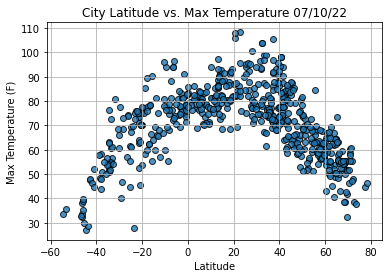

In [24]:
# Import time module
import time

# Build the scatter plot for latitude vs. max temperature.   add x- and y-axis data to plt.scatter().
plt.scatter(lats,
            max_temps,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Max Temperature "+ time.strftime("%x"))
plt.ylabel("Max Temperature (F)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure. Created the file weather_data under World_Weather_Analysis
plt.savefig("weather_data/Fig1.png")

# Show plot.
plt.show()

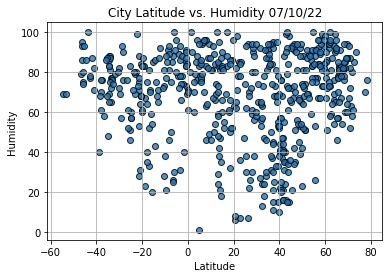

In [25]:
## Change the y-axis variable for each weather parameter. Module 6.3.2   HUMIDiTY
# Import time module
import time

# Build the scatter plot for latitude vs. max temperature.
plt.scatter(lats,
            humidity,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Humidity "+ time.strftime("%x"))
plt.ylabel("Humidity")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure. Created the file weather_data under World_Weather_Analysis
plt.savefig("weather_data/Fig2.png")

# Show plot.
plt.show()

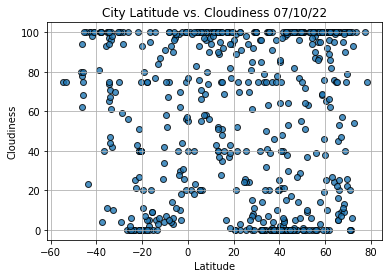

In [26]:
## Change the y-axis variable for each weather parameter. Module 6.3.2  CLOUDINESS
# Import time module
import time

# Build the scatter plot for latitude vs. max temperature.
plt.scatter(lats,
            cloudiness,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Cloudiness "+ time.strftime("%x"))
plt.ylabel("Cloudiness")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure. Created the file weather_data under World_Weather_Analysis
plt.savefig("weather_data/Fig3.png")

# Show plot.
plt.show()

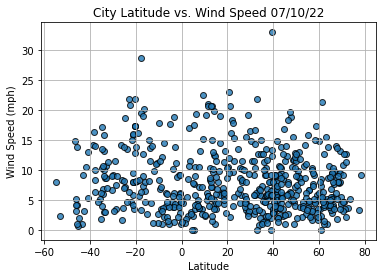

In [27]:
## Change the y-axis variable for each weather parameter. Module 6.3.2  WIND SPEED
# Import time module
import time

# Build the scatter plot for latitude vs. max temperature.
plt.scatter(lats,
            wind_speed,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Wind Speed "+ time.strftime("%x"))
plt.ylabel("Wind Speed (mph)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure. Created the file weather_data under World_Weather_Analysis
plt.savefig("weather_data/Fig4.png")

# Show plot.
plt.show()